In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
git_url = 'https://raw.githubusercontent.com/Ftagliavini/DataScience/main/titles.csv?token=GHSAT0AAAAAACCBTXYZKO2TYWXHVMM5XNYCZCONI5A'
titulos_nfx = pd.read_csv(git_url, sep = ',')

In [22]:
titulos_nfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [4]:
titulos_nfx.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6137.000000,6137.000000,2306.000000,5669.000000,5.653000e+03,6061.000000,5885.000000
mean,2017.371843,76.381946,2.106678,6.540942,2.115029e+04,19.267196,6.633194
std,6.603620,39.086828,2.716844,1.135944,9.254225e+04,51.291407,1.251610
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2017.000000,44.000000,1.000000,5.800000,5.170000e+02,3.381000,6.000000
50%,2019.000000,80.000000,1.000000,6.600000,2.095000e+03,7.580000,6.791000
75%,2021.000000,105.000000,2.000000,7.300000,8.884000e+03,16.523000,7.400000
max,2023.000000,225.000000,44.000000,9.600000,2.684317e+06,1078.637000,10.000000


In [29]:
titulos_nfx['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [51]:
#titulos_nfx['genres'].unique()
titulos_nfx['genres'].describe()

count           6137
unique          1712
top       ['comedy']
freq             516
Name: genres, dtype: object

In [15]:
#titulos_nfx['age_certification'].unique()
titulos_nfx['age_certification'].describe()

count      3394
unique       12
top       TV-MA
freq       1018
Name: age_certification, dtype: object

In [16]:
titulos_nfx['production_countries'].describe()

count       6137
unique       438
top       ['US']
freq        1981
Name: production_countries, dtype: object

#etiquetar ejes
    ax.set_xlabel
    ax.set_ylabel
#agregar título al gráfico
    ax.set_title
#agregar una leyenda
    ax.legend
#definir límites
    ax.set_xlimit
    ax.set_ylimit
#agregar una línea vertical
    ax.axvline
#agregar una línea horizontal
    ax-axhline
#lista de parametrizaciones
    mpl.rcParams.keys()

# Gráficar proporción de mercado entre series y películas

In [38]:
tipos = titulos_nfx['type'].value_counts()
print(tipos)

MOVIE    3831
SHOW     2306
Name: type, dtype: int64


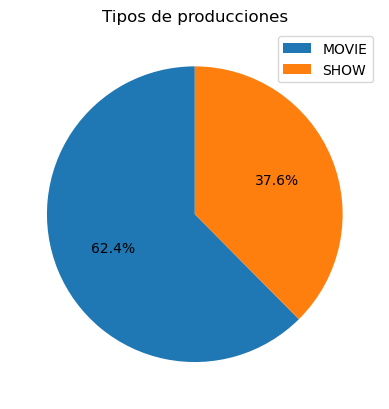

In [50]:
fig, ax = plt.subplots()
ax.pie(tipos,autopct = '%1.1f%%',startangle=90)
ax.set_title('Tipos de producciones')
ax.legend(tipos.index)


# # Graficar línea de tiempo de producciones

In [81]:
#x=release_year
#y=tipos
temporal = titulos_nfx[['release_year','type']]
temporal

,release_year,type
0,1945,SHOW
1,1976,MOVIE
2,1978,MOVIE
3,1973,MOVIE
4,1979,MOVIE
...,...,...
6132,2023,MOVIE
6133,2023,MOVIE
6134,2023,MOVIE
6135,2023,MOVIE


In [82]:
tipos_years = titulos_nfx['release_year'].unique()
tipos_years

array([1945, 1976, 1978, 1973, 1979, 1975, 1969, 1954, 1977, 1971, 1958,
       1972, 1966, 1980, 1974, 1962, 1963, 1956, 1970, 1989, 1986, 1985,
       1982, 1990, 1988, 1984, 1987, 1981, 1983, 2000, 1999, 1997, 1993,
       1994, 1992, 1998, 1995, 1996, 1991, 2008, 2010, 2005, 2003, 2009,
       2002, 2001, 2006, 2007, 2004, 2011, 2012, 2014, 2013, 2015, 2016,
       2018, 2017, 2019, 2020, 2022, 2021, 2023], dtype=int64)

In [83]:
tipos = titulos_nfx[['release_year','type']]
tipos

,release_year,type
0,1945,SHOW
1,1976,MOVIE
2,1978,MOVIE
3,1973,MOVIE
4,1979,MOVIE
...,...,...
6132,2023,MOVIE
6133,2023,MOVIE
6134,2023,MOVIE
6135,2023,MOVIE


In [126]:
x = tipos['release_year'].unique()
y_movie = tipos[tipos['type'] == 'MOVIE']
y_show = tipos[tipos['type'] == 'SHOW']
print(y_show.isnull().sum())
print(y_movie.isnull().sum())


release_year    0
type            0
dtype: int64
release_year    0
type            0
dtype: int64


In [129]:
y_movie_grouped_year = y_movie.groupby('release_year').count()
y_movie_grouped_year

,type
release_year,
1954,2
1956,1
1958,1
1962,1
1963,1
...,...
2019,473
2020,496
2021,542


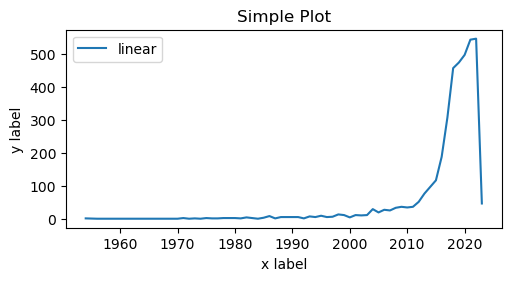

In [131]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(y_movie_grouped_year, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

In [132]:
y_show_grouped_year = y_show.groupby('release_year').count()
y_show_grouped_year

,type
release_year,
1945,1
1969,1
1972,1
1981,1
1984,1
1987,1
1989,1
1991,2
1992,2


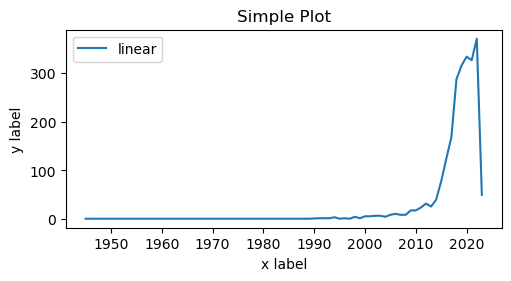

In [133]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(y_show_grouped_year, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")

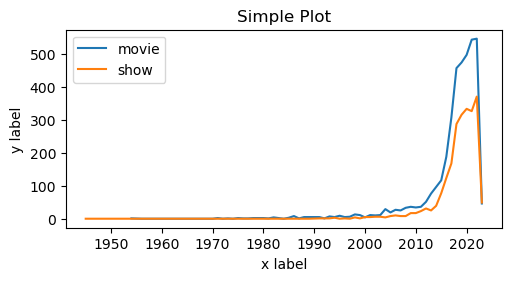

In [134]:
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(y_movie_grouped_year, label='movie')
plt.plot(y_show_grouped_year, label='show')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()